# 3-Layer Neural Network

* 3-Layer Neural Network form scratch using numpy

In [2]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=fec56ee34d503056930663e1c11b4bff8d34a25ed17e71861c595d67947d9300
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=e3f09b20fee541f75f638a164e6df0d47e791f7640ea9461ea6057b06b37e7c8
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

# Non-Linearity

* Consider a non-linear equation 
y = 3x1 - x2 + 0.5x3 + 1.5, where w0, w1, w3, b = 3, -1, 0.5, 1.5

In [28]:
n = 100  # number of sample

d = 3  # 3-dimensional

x = np.random.uniform(-1, 1, (n, d)) # generate random variables btw -1 and 1 of size (100, 3)
x

array([[-0.67534015, -0.03689458, -0.99356485],
       [-0.15900921, -0.21728161, -0.87713384],
       [-0.29062424,  0.62922788, -0.17361629],
       [ 0.64199548,  0.0993846 , -0.12905637],
       [-0.49991422,  0.44224556,  0.89899773],
       [ 0.96767294, -0.99124731,  0.24329322],
       [-0.18837088, -0.12326628,  0.50277173],
       [ 0.97102214, -0.44872144, -0.59958116],
       [ 0.92138713,  0.75146742, -0.0037179 ],
       [ 0.34034855,  0.28420974,  0.5604581 ],
       [-0.28416479,  0.06499469,  0.03188303],
       [ 0.88272243,  0.63444173, -0.0331846 ],
       [-0.87965947,  0.45109968, -0.40448025],
       [ 0.77924253,  0.89678642, -0.90851391],
       [ 0.85301464,  0.21603928,  0.60581544],
       [-0.91001225,  0.73687962, -0.20037287],
       [-0.0180318 ,  0.14404715, -0.79366141],
       [-0.60735339,  0.72576271,  0.91995375],
       [-0.68237812, -0.27801174, -0.7906455 ],
       [-0.66922718,  0.03810026,  0.83081186],
       [ 0.66033544,  0.99229739,  0.546

x: (100, 3), weights: (3, 1), bias: (1,), y: (100, 1)


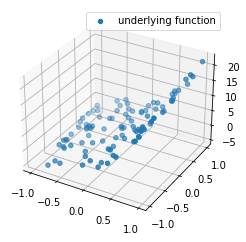

In [44]:
#y = 3x^3 - x^2 + 0.5x + 1.5

#weights_true = np.array([[3, -1, 0.5],]).T
#bias_true = np.array([1.5])

x = np.random.uniform(-1, 1, (n, 3))

weights_true = np.array([[6, 1, 1],]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true

#y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_4d(X, y, y_pred=None):
 # Compute a 3D embedding of the data using UMAP
  umap_3d = umap.UMAP(n_components=3)
  X_umap_3d = umap_3d.fit_transform(X)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_4d(x, y_true)

In [8]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

# MSE

In [10]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

# Back Propagation

In [11]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [12]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)


Epoch 0, loss 40.0824200482071
Epoch 1, loss 32.87045137694367
Epoch 2, loss 27.531314887128307
Epoch 3, loss 23.477811458415005
Epoch 4, loss 20.325348596901296
Epoch 5, loss 17.81919950412312
Epoch 6, loss 15.788275430300434
Epoch 7, loss 14.115693555459929
Epoch 8, loss 12.719991695059768
Epoch 9, loss 11.54309839106015
Epoch 10, loss 10.542594698980128
Epoch 11, loss 9.686707166240948
Epoch 12, loss 8.951042944375041
Epoch 13, loss 8.316439619098082
Epoch 14, loss 7.767531281337235
Epoch 15, loss 7.291777357127646
Epoch 16, loss 6.878792599366592
Epoch 17, loss 6.519874920649655
Epoch 18, loss 6.207664747907355
Epoch 19, loss 5.935893108370184
Epoch 20, loss 5.699190648536203
Epoch 21, loss 5.492939366755979
Epoch 22, loss 5.313154982835357
Epoch 23, loss 5.1563918265841755
Epoch 24, loss 5.019664694647015
Epoch 25, loss 4.900383804094038
Epoch 26, loss 4.796300081250158
Epoch 27, loss 4.705458767892638
Epoch 28, loss 4.626159833351114
Epoch 29, loss 4.5569240325861315
Epoch 30, lo

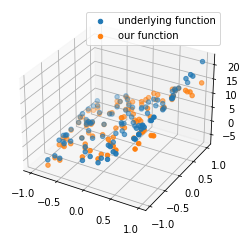

In [45]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, linear(x))

# To avoid this underfitting, introduce relu layer where it clips all the values less than 0 to 0 and leaves the rest as is.

In [14]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


50.874466951729744


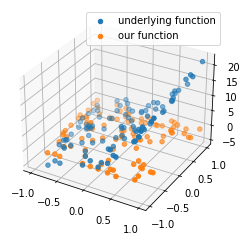

In [46]:
import torch

class Model:
  def __init__(self, input_dim, num_hidden1):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden1)
    self.linear3 = Linear(num_hidden1, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu(l1)
    l2 = self.linear2(r1)
    r2 = self.relu(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient2 = self.relu.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu_gradient2)
    relu_gradient1 = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient1)
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 20)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_4d(x, y_true, y_pred)

In [51]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.01)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

56.34410322414742
52.31106010904844


Epoch 0, loss 52.31106010904844
Epoch 1, loss 49.70830011138427
Epoch 2, loss 47.8357461163435
Epoch 3, loss 46.3342509414058
Epoch 4, loss 45.01980373117769
Epoch 5, loss 43.74327723193115
Epoch 6, loss 42.534495021255516
Epoch 7, loss 41.33581785784945
Epoch 8, loss 40.047128249041755
Epoch 9, loss 38.71411665625732
Epoch 10, loss 37.28345851260212
Epoch 11, loss 35.72158660934345
Epoch 12, loss 33.98467712905371
Epoch 13, loss 32.09029310488931
Epoch 14, loss 30.014157806095568
Epoch 15, loss 27.759860318299253
Epoch 16, loss 25.324956652845554
Epoch 17, loss 22.777045652128077
Epoch 18, loss 20.278553880389364
Epoch 19, loss 17.914539364988965
Epoch 20, loss 15.601111500783587
Epoch 21, loss 13.415955377832882
Epoch 22, loss 11.405412296184402
Epoch 23, loss 9.61974378733023
Epoch 24, loss 8.119498550237687
Epoch 25, loss 6.89378322600125
Epoch 26, loss 5.925314929233823
Epoch 27, loss 5.114201038226045
Epoch 28, loss 4.441493123697862
Epoch 29, loss 3.8900977461345247
Epoch 30, lo

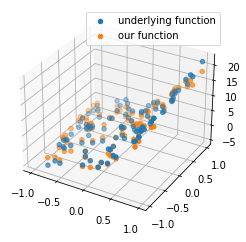

In [52]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=40)
plot_4d(x, y_true, model(x))

* With learning rate = 0.01, our model fits well with the data points.